# TensorFlow Core Learning Algorithms:

There are 4 main learning algorithms that are a part of TensorFlow, these are:

* Linear Regression
* Classification
* Clustering
* Hidden Markov Models

Most Business and Application implementations of Machine Learning use very basic Machine Learning models, as even these very simple models are capable of doing some very powerful things.

These fundamental/'*core*' Machine Learning models can be used in almost all basic applications.

There are many different tools and methods to solve the same problems within TensorFlow, although the ones that I will be going through are those chosen by the lecture.

***DON'T*** feel pressured to memorise the syntax!

# Linear Regression:
"One of the most basic forms of Machine Learning, and is used to predict numerical values"

"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points"

**Project:**
In this lecture we'll be using Linear Regression to predict the survival rate of passengers from the Titanic
* This uses https://www.tensorflow.org/tutorials/estimator/linear heavily


# How Linear Regression Works:
Linear Regression refers to a way of calculating a 'line of best fit'. If data-points are related linearly, you are able to create a line of best fit, and predict future values.

**Here is an example**:

(0.0, 6.0, 0.0, 20.0)

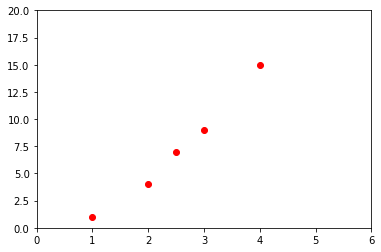

In [154]:
import matplotlib.pyplot as plt
import numpy as np

#making a simple dataset:

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, "ro")
plt.axis([0, 6, 0, 20])

From this graph, it is evident that the dataset has a linear correspondance, and could therefore benefit from Linear Regression to predict future values.

In this example, this will only use one input variable, as it is 2 dimensional, although in larger datasets, it will requite a lot more variables and inputs.

An equation for a line in 2d is: 

$$y=mx+c$$

Here is an example of a line of best fit for the above graph:

<function matplotlib.pyplot.show(close=None, block=None)>

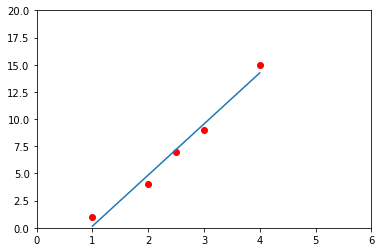

In [155]:
import matplotlib.pyplot as plt
import numpy as np

#making a simple dataset:

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, "ro")
plt.axis([0, 6, 0, 20])
#Original dataset for convenience

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
#Linear regression example

plt.show

With this line of best fit, you are able to predict future values.

# Setup
This portion includes most of the imports:

In [156]:
#All the needed imports for this example:

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# Data:
Data is the **MOST** important part of Machine Learning!

In this example, I'll go through exploring, cleaning and selecting appropriate data.

This uses the 'Titanic' dataset, which has a large amount of information for each passenger, so I'll go through the data and explore!

**Here I'll go through loading the database and how to explore it using built-in tools**

In [157]:
# Load dataset.

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #testing

y_train = dftrain.pop('survived') # removes this column from the original datasets, and puts it in it's own variable
y_eval = dfeval.pop('survived')

Using the `pd.read_csv()` method allows for the creation of a 'dataframe' (a bit like a large table), which you can refer to and edit later.

In this example, we used the '**survived**' column and sorted it into a variable.

To look at the data, I'll be using ``.head()`` from Pandas. This allows for looking at the '*head*' of the data (i.e. the first 5 lines), a bit like it is in Unix.

In [ ]:
dftrain.head() # Looking at the top 5 columns of this dataset

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Same thing for the other dataset

In [ ]:
dfeval.head() #looking at the top 5 columns of this dataset

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


To test how many rows there are in each dataset, you can use the ``.shape()`` command.

In [ ]:
dftrain.shape[0], dfeval.shape[0]

# In this case there are 627 lines in dftrain and 264 in dfeval

(627, 264)

If you want to have a more statistical analysis of the data, you can use the ``.describe()`` command. This gives some common statistical values that can be useful.

In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


Same thing for the other dataset

In [ ]:
dfeval.describe()

,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


In order to make more sense of the data, it is valuable to generate some visual representations to look at potential ways you can work with the data.

<AxesSubplot:>

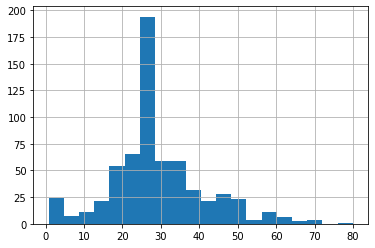

In [ ]:
# A Histogram to denote age:

dftrain.age.hist(bins=20)

From this histogram, it is quite obvious that most of the passengers in this training set are in their 20s and 30s.

<AxesSubplot:>

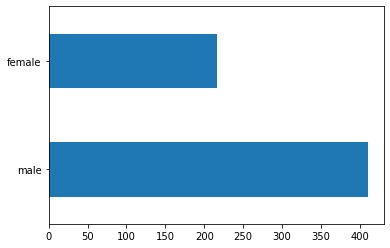

In [ ]:
# A bar chart to represent sex in those who travelled:

dftrain.sex.value_counts().plot(kind='barh')

From this bar chart, it is quite obvious that there were about twice the amount of males compared to females.

<AxesSubplot:>

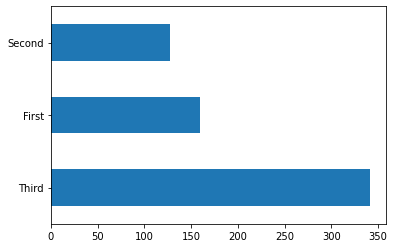

In [ ]:
# Looking at what class most of the passengers were in:

dftrain['class'].value_counts().plot(kind='barh')

From this bar graph, it is quite obvious that the majority of passengers were in Third class, with Second and First class having similar numbers.

Text(0.5, 0, '% survive')

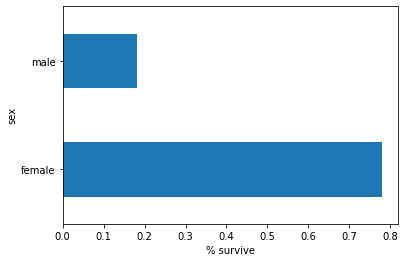

In [ ]:
#Looking at survival rate and sex (seeing if there is a correlation)

pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

From this bar graph it is very obvious that if you are female in this example with the Titanic, you have a significantly larger chance of survival. 

This therefore has a good chance of being a predictive feature for this model.

# Training vs Testing data:

When creating a Machine Learning model, it is important to use multiple datasets, usually using one to train the Machine Learning model, and another to test and validate the Machine Learning model.

In this example, there are 2 datasets, these are:

* **Training**
  * Usually much larger than the testing dataset, allows for the model to adapt and learn.
* **Testing**
  * Allows for you to use a different set of data (to avoid the model from potentially 'memorising' the data), to test how well the model is going. 

This allows for the model to be able to work on '***NEW***' data, therefore requires for there to be seperate datasets for testing and training.

This can be seen in the difference in dataset size, as seen below (already seen above, but I'll do it again for convenience).



In [ ]:
Training = dftrain.shape
Evaluation = dfeval.shape

print("Training Dataset size:")
print(Training) #Shows the amount of rows (amount of data points), and the amount of columns (amount of variables per data point)

print("Evaluation Dataset size:")
print(Evaluation) #Shows the amount of rows (amount of data points), and the amount of columns (amount of variables per data point)

Training Dataset size:
(627, 9)
Evaluation Dataset size:
(264, 9)


From this, it is evident that the training dataset is significantly larger compared to the testing dataset.

# Catagorising Data:

There are 2 main types of data, and it is important to separate them (so the Machine Learning algorithm is able to manipulate them accordingly).

These are:

* **Catagorical Data**
* **Numerical Data**